<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AccountID            2512 non-null   object 
 1   TransactionAmount    2512 non-null   float64
 2   Location             2512 non-null   object 
 3   DeviceID             2512 non-null   object 
 4   IP Address           2512 non-null   object 
 5   MerchantID           2512 non-null   object 
 6   Channel              2512 non-null   object 
 7   CustomerAge          2512 non-null   int64  
 8   CustomerOccupation   2512 non-null   object 
 9   TransactionDuration  2512 non-null   int64  
 10  LoginAttempts        2512 non-null   int64  
 11  AccountBalance       2512 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 235.6+ KB
None
Accuracy with Linear Kernel:  0.5039787798408488
Accuracy with Polynomial Kernel: 0.7811671087533156
Polynomial kernel perfo

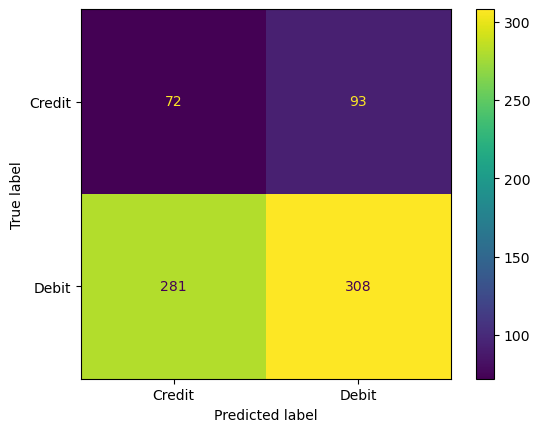

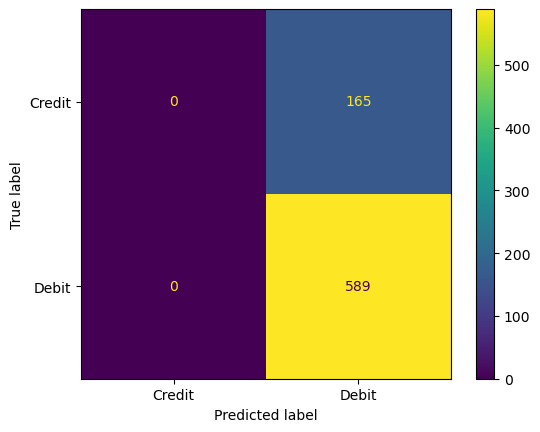

In [ ]:
# SVM 
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('./Datasets/bank_transactions_data_2.csv')

# Define target variable and features
# Assuming 'TransactionType' is the target variable and is categorical (e.g., Credit vs Debit)
X = data.drop(columns=['TransactionID', 'TransactionDate', 'PreviousTransactionDate', 'TransactionType'])  # Drop non-informative columns
y = data['TransactionType']

print(X.info())

categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Fill any missing values
X.fillna(X.mean())  # Filling missing numeric values with the mean

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate SVM with Linear Kernel
# max_iter : This sets the maximum number of iterations the algorithm will perform during optimization (i.e., training).
# tol : The training will stop when the difference in the optimization objective between iterations is smaller than this threshold (1e-3 or 0.001).
# Linear Kernel SVM
svm_linear = SVC(kernel='linear', random_state=42, max_iter=2000, tol=0.0001)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy with Linear Kernel: ",accuracy_linear)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_linear)

# Train and evaluate SVM with Polynomial Kernel
poly_svm = SVC(kernel='poly', degree=3, random_state=42)  # degree=3 for cubic polynomial
poly_svm.fit(X_train, y_train)
y_pred_poly = poly_svm.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Accuracy with Polynomial Kernel:", accuracy_poly)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_poly)

# Comparison
if accuracy_linear > accuracy_poly:
    print("Linear kernel performs better.")
else:
    print("Polynomial kernel performs better.")
